In [11]:
import os
import pandas as pd

from DataExtractor import DataExtractor
from DataUtils import *
from VizTools import *

In [ ]:
# Set the path variables
_path = os.path.join(os.getcwd(), "datasets/crime")

db = 'crime_data'
year = 2017
query = "SELECT * FROM crime_" + str(year) + ";"

data_extractor = DataExtractor()
crime_df = data_extractor.read_db(db=db, query=query)


Dataframe columns :
	 ID	 Date	 Block	 IUCR	 Primary Type	 Description	 Location Description	 Arrest	 Domestic	 Beat	 District	 Ward	 Community Area	 FBI Code	 X Coordinate	 Y Coordinate	 Year	 Location	 month	 day	 quarter	 week_no	 crime_count	 day_name

In [107]:

print_columns(crime_df)


Dataframe columns :
	 ID	 Date	 Block	 IUCR	 Primary Type	 Description	 Location Description	 Arrest	 Domestic	 Beat	 District	 Ward	 Community Area	 FBI Code	 X Coordinate	 Y Coordinate	 Year	 Location	 month	 day	 quarter	 week_no	 crime_count	 day_name

In [106]:
crime_df.head(5)

Dataframe columns :
	 ID	 Date	 Block	 IUCR	 Primary Type	 Description	 Location Description	 Arrest	 Domestic	 Beat	 District	 Ward	 Community Area	 FBI Code	 X Coordinate	 Y Coordinate	 Year	 Location	 month	 day	 quarter	 week_no	 crime_count	 day_name

In [ ]:
# Clean the data and prep it for visualisation
print(crime_df.shape)
crime_df = clean_data(crime_df)
print(crime_df.shape)

In [ ]:
crime_df["day_name"] = crime_df.apply(lambda row: row["Date"].strftime("%A"), axis=1)

Can we see how crime behaves temporally?

In [98]:
crime_monthly_daily = crime_df.groupby(by=["month", "day_name"], as_index=False).sum()[["month", "day_name", 
                                                                                        "Arrest", "crime_count"]]
crime_monthly = crime_monthly_daily.groupby(by="month", as_index=False).sum().reset_index(drop=True)[["month", 
                                                                                                      "Arrest", "crime_count"]]
crime_daily = crime_monthly_daily.groupby(by="day_name", as_index=False).sum().reset_index(drop=True)[["day_name", 
                                                                                                      "Arrest", "crime_count"]]

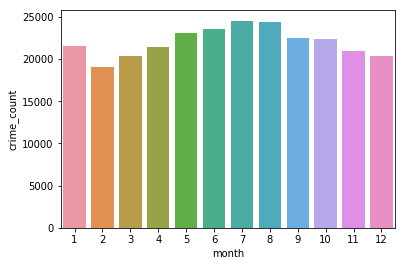

In [99]:
g = plot_bar(df=crime_monthly, x="month", y="crime_count")

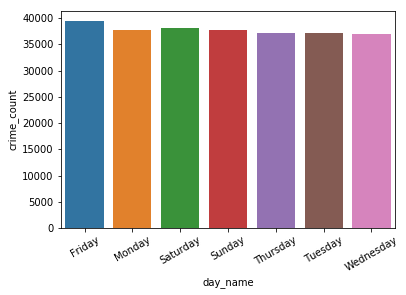

In [100]:
g = plot_bar(df=crime_daily, x="day_name", y="crime_count", xrot=30)

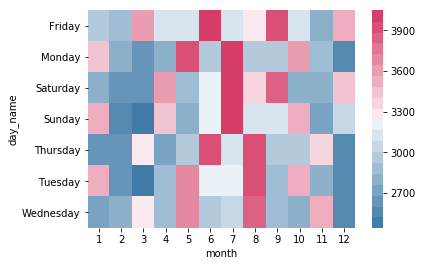

In [101]:
# Plot a heatmap of day to month
heatmap_data = crime_monthly_daily.pivot("day_name",
                               "month", "crime_count")


In [ ]:
col_palette = sns.diverging_palette(240, 1, n=20)
g = sns.heatmap(data=heatmap_data, cmap=col_palette)